In [1]:
url= 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'


In [2]:
import os

In [3]:
os.path.basename(url)

'housing.tgz'

In [4]:
file_path = r"C:\Users\ABHI\Desktop\Acer-data\Ineuron.Ai\Machine-Learning\Machine-Learning-End-to-End-Project\Machine-Learning-End-to-End-Project\config"

In [5]:
os.listdir(file_path)[0]

'config.yaml'


# Data Ingestion

In [6]:
import pandas as pd

In [7]:
csv_file_path = r'C:\Users\ABHI\Desktop\Acer-data\Ineuron.Ai\Machine-Learning\Machine-Learning-End-to-End-Project\Machine-Learning-End-to-End-Project\Housing\artifact\data_ingestion\2023-11-10-00-12-40\raw_data\housing.csv'

In [8]:
housing_data_frame = pd.read_csv(csv_file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ABHI\\Desktop\\Acer-data\\Ineuron.Ai\\Machine-Learning\\Machine-Learning-End-to-End-Project\\Machine-Learning-End-to-End-Project\\Housing\\artifact\\data_ingestion\\2023-11-10-00-12-40\\raw_data\\housing.csv'

In [16]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

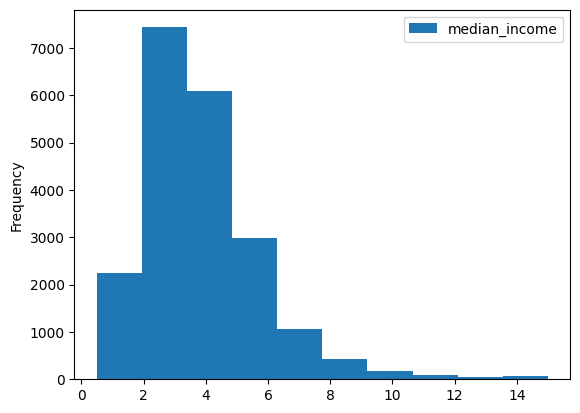

In [20]:
housing_data_frame[['median_income']].plot(kind='hist')

In [22]:
import numpy as np

In [23]:
housing_data_frame['income_cat'] = pd.cut(
    housing_data_frame['median_income'],
    bins=[0.0,1.5,3.0,4.5,6.0,np.inf],
    labels= [1,2,3,4,5]
)

In [27]:
housing_data_frame.income_cat.value_counts() 

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

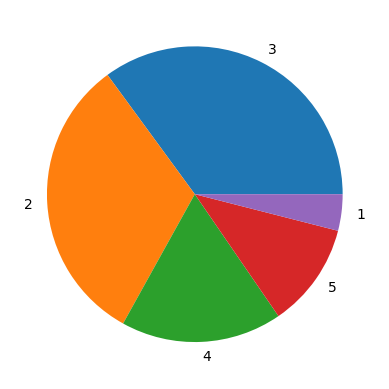

In [36]:
plt.pie(housing_data_frame.income_cat.value_counts(),labels=housing_data_frame.income_cat.value_counts().index)
plt.show()

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

In [43]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [47]:
for train_index,test_index in split.split(housing_data_frame,housing_data_frame['income_cat']):
    strat_train_set = housing_data_frame.loc[train_index].drop(['income_cat'],axis=1)
    strat_test_set = housing_data_frame.loc[test_index].drop(['income_cat'],axis=1)

In [48]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [49]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


In [51]:
for train_ix,test_ix in split.split(housing_data_frame,housing_data_frame['income_cat']):
    print(train_ix,test_ix)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [52]:
train_df = housing_data_frame.loc[train_ix]

In [54]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [55]:
strat_train_set.shape

(16512, 10)

In [56]:
strat_test_set.shape

(4128, 10)

In [58]:
housing_data_frame.shape

(20640, 11)

In [59]:
16512/20640*100

80.0

In [60]:
4128/20640*100

20.0

In [61]:
test_df = housing_data_frame.loc[test_ix]

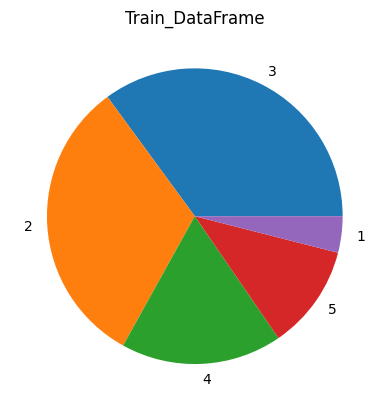

In [65]:
plt.pie(train_df.income_cat.value_counts(),labels=train_df.income_cat.value_counts().index)
plt.title('Train_DataFrame')
plt.show()


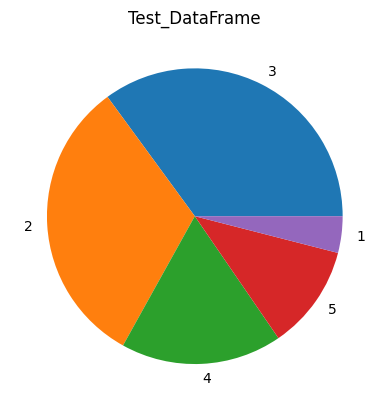

In [67]:
plt.pie(test_df.income_cat.value_counts(),labels=test_df.income_cat.value_counts().index)
plt.title('Test_DataFrame')
plt.show()

In [70]:
housing_data_frame.columns,housing_data_frame.dtypes

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 longitude              float64
 latitude               float64
 housing_median_age     float64
 total_rooms            float64
 total_bedrooms         float64
 population             float64
 households             float64
 median_income          float64
 median_house_value     float64
 ocean_proximity         object
 income_cat            category
 dtype: object)

In [72]:
housing_data_frame.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64)],
      dtype=object)

In [76]:
data_type = list(map(lambda x:str(x).replace("dtype('","").replace("')",""),housing_data_frame.dtypes.values))

In [77]:
columns = housing_data_frame.columns

In [79]:
dict(zip(columns,data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}

In [1]:
from collections import namedtuple

In [2]:
DataIngestionArtifact = namedtuple("DataIngestionArtifact",
                                   ["train_file_path","test_file_path","is_ingested","message"])

In [6]:
DataIngestionArtifact

__main__.DataIngestionArtifact

In [7]:
import os

In [16]:
Root = os.getcwd()


In [15]:
os.getcwd()

'C:\\Users\\ABHI\\Desktop\\Acer-data\\Ineuron.Ai\\Machine-Learning\\Machine-Learning-End-to-End-Project\\Machine-Learning-End-to-End-Project\\config'

In [14]:
os.chdir(r'C:\Users\ABHI\Desktop\Acer-data\Ineuron.Ai\Machine-Learning\Machine-Learning-End-to-End-Project\Machine-Learning-End-to-End-Project\config')

In [1]:
pip install evidently

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 991.0 kB/s eta 0:00:10
     ---------------------------------------- 0.1/9.2 MB 1.3 MB/s eta 0:00:07
      --------------------------------------- 0.2/9.2 MB 1.6 MB/s eta 0:00:06
     - -------------------------------------- 0.3/9.2 MB 1.6 MB/s eta 0:00:06
     - -------------------------------------- 0.4/9.2 MB 1.7 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/9.2 MB 2.0 MB/s eta 0:00:05
     --- ------------------------------------ 0.7/9.2 MB 2.1 MB/s eta 0:00:05
     --- ------------------------------------ 0.9/9.2 MB 2.3 MB/s eta 0:00:04
     ---- ----------------------------------- 1.1/9.2 MB 2.5 MB/s eta 0:00:04
     ----- ---------------------------------- 1.3/9.2 MB 2.8 MB/s eta 0:00:03
     ------ --------------------------------- 1.5/9.2 MB 2.9 MB/s eta 0:00:03
     ------- -------------------------------- 1.8/9.2 MB 3.1 MB/s eta

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [6]:
from evidently.model_profile import Profile
from evidently.model_profile.sections import DataDriftProfileSection
from evidently.dashboard import Dashboard
from evidently.dashboard.tabs import DataDriftTab

In [7]:
import json

In [8]:
profile = Profile(sections=[DataDriftProfileSection()])

In [5]:
profile = Profile(sections=[DataDriftProfileSection()])
# train_df,test_df = selfget_train_and_test_df()

profile.calculate(train_df,test_df)

report = json.loads(profile.json())

with open(data_validation_config.report_file_path,"W") as report_file:
    json.dump(report, report_file, indent=6)
    return report

TypeError: Profile.__init__() missing 1 required positional argument: 'sections'

In [11]:
pip install os-sys

     ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/15.6 MB 1.1 MB/s eta 0:00:15
     ---------------------------------------- 0.2/15.6 MB 1.1 MB/s eta 0:00:14
      --------------------------------------- 0.3/15.6 MB 1.4 MB/s eta 0:00:11
      --------------------------------------- 0.4/15.6 MB 1.6 MB/s eta 0:00:10
     - -------------------------------------- 0.5/15.6 MB 1.7 MB/s eta 0:00:09
     - -------------------------------------- 0.5/15.6 MB 1.7 MB/s eta 0:00:09
     - -------------------------------------- 0.6/15.6 MB 1.6 MB/s eta 0:00:10
     - -------------------------------------- 0.7/15.6 MB 1.7 MB/s eta 0:00:09
     - -------------------------------------- 0.7/15.6 MB 1.7 MB/s eta 0:00:09
     - -------------------------------------- 0.8/15.6 MB 1.5 MB/s eta 0:00:10
     -- ------------------------------------- 0.8/15.6 MB 1.6 MB/s

ERROR: os-sys has an invalid wheel, os-sys has an invalid wheel, could not read 'os_sys-1.9.3.dist-info/WHEEL' file: KeyError("There is no item named 'os_sys-1.9.3.dist-info/WHEEL' in the archive")


In [3]:
pip install evidently==0.2.8

     ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
     --------------------------------------- 0.0/12.1 MB 653.6 kB/s eta 0:00:19
     ---------------------------------------- 0.1/12.1 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.2/12.1 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.4/12.1 MB 2.0 MB/s eta 0:00:06
     - -------------------------------------- 0.5/12.1 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.6/12.1 MB 2.1 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/12.1 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.1 MB 2.8 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.1 MB 2.7 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/12.1 MB 3.0 MB/s eta 0:00:04
     ----- ---------------------------------- 1.6/12.1 MB 3.2 MB/s eta 0:00:04
     ------ --------------------------------- 1.8/12.1 MB 

from evidently.model_profile.sections import DataDriftProfileSection, CatTargetDriftProfileSection


In [9]:
url= 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'


In [11]:
import tarfile
from six.moves import urllib


In [13]:
file_path = r"C:\Users\ABHI\Desktop\Acer-data\Ineuron.Ai\Machine-Learning\Machine-Learning-End-to-End-Project\Machine-Learning-End-to-End-Project"


In [12]:
housing_file_name = os.path.basename(url)
housing_file_name

'housing.tgz'

In [14]:
tgz_file_path = os.path.join(file_path, housing_file_name)

In [15]:
urllib.request.urlretrieve(url, tgz_file_path)

('C:\\Users\\ABHI\\Desktop\\Acer-data\\Ineuron.Ai\\Machine-Learning\\Machine-Learning-End-to-End-Project\\Machine-Learning-End-to-End-Project\\housing.tgz',
 <http.client.HTTPMessage at 0x27a678f4fd0>)

In [23]:
tgz_file_path

'C:\\Users\\ABHI\\Desktop\\Acer-data\\Ineuron.Ai\\Machine-Learning\\Machine-Learning-End-to-End-Project\\Machine-Learning-End-to-End-Project\\housing.tgz'

In [30]:
os.chdir(r'c:\\Users\\ABHI\\Desktop\\Acer-data\\Ineuron.Ai\\Machine-Learning\\Machine-Learning-End-to-End-Project\\Machine-Learning-End-to-End-Project\\')

In [31]:
os.getcwd()

'c:\\Users\\ABHI\\Desktop\\Acer-data\\Ineuron.Ai\\Machine-Learning\\Machine-Learning-End-to-End-Project\\Machine-Learning-End-to-End-Project'

In [32]:
os.listdir()

['.dockerignore',
 '.git',
 '.gitignore',
 'app.py',
 'build',
 'config',
 'demo.py',
 'dist',
 'DockerFile',
 'house_predictor.egg-info',
 'Housing',
 'housing.tgz',
 'housing_logs',
 'LICENSE',
 'notebook',
 'README.md',
 'requirements.txt',
 'setup.py',
 'venv']